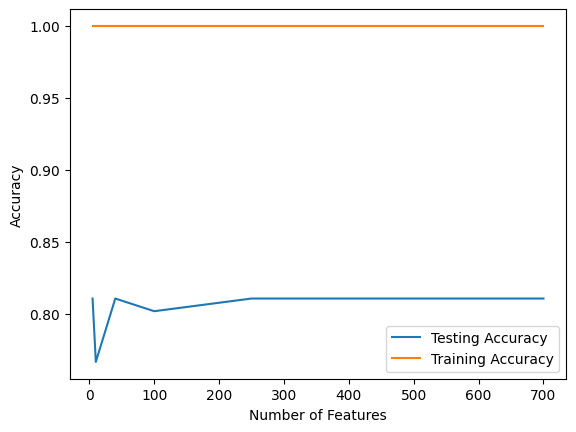

In [7]:
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

number_of_features_list = [5, 10, 40, 100, 250, 700]
testing_accuracy_list = []
training_accuracy_list = []

# 1. load and partition data
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

for i in number_of_features_list:
    # 2. feature selection
    X = df.drop('class', axis=1)
    y = df['class']
    mutual_info = mutual_info_classif(X, y, random_state = 1)
    selected_features = X.columns[mutual_info.argsort()[-i:]]
    X = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y)

    # 3. learn classifier
    predictor = tree.DecisionTreeClassifier(random_state=1)
    predictor.fit(X_train, y_train)

    # 4. evaluate classifier
    y_pred = predictor.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred)
    testing_accuracy_list.append(testing_accuracy)
    training_accuracy_list.append(metrics.accuracy_score(y_train, predictor.predict(X_train)))

# 5. plot number of features vs testing accuracy and training accuracy
plt.plot(number_of_features_list, testing_accuracy_list)
plt.plot(number_of_features_list, training_accuracy_list)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend(['Testing Accuracy', 'Training Accuracy'])
plt.show()